In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 농어(perch) 데이터 입력
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

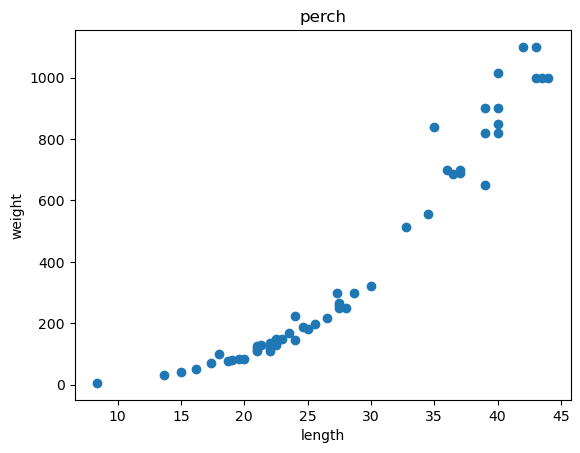

In [3]:
# 농어 데이터의 x축 length, y축 weight로 산점도 그리기.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [6]:
print(train_input.shape)

(42, 1)


In [7]:
# 다항회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(train_poly, train_target)

LinearRegression()

In [10]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [11]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


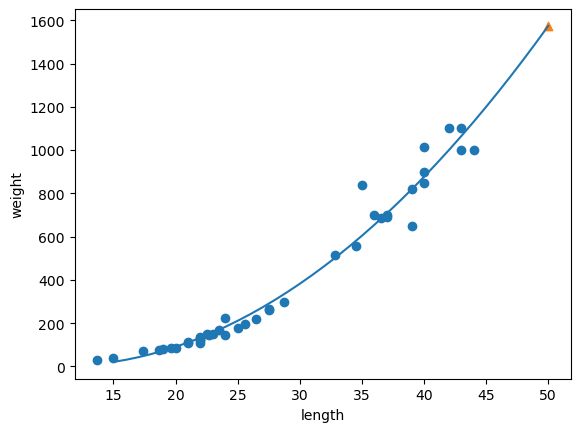

In [12]:
# 다항회귀 학습 모델 그리기

# 직선을 그리기 위한 x축 배열 만들기
point = np.arange(15, 51)

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 학습한 2차방정식 그래프
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
# 모델 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


In [14]:
# 다중회귀
# 농어의 '길이', '높이', '넓이'데이터프레임 준비
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/KGW852/class/main/data/fish_perch.csv')
perch = df.to_numpy()
print(perch)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [15]:
# 농어의 '무게' 타깃 데이터 준비
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [16]:
# 훈련세트 & 테스트세트 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch, perch_weight, random_state=42)

In [17]:
# 사이킷런 변환기 : 전처리
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


In [18]:
# 특성 클래스 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [19]:
# 테스트세트 전처리
test_poly = poly.transform(test_input)

print(test_poly.shape)

(14, 9)


In [20]:
# 다중회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(train_poly, train_target)

LinearRegression()

In [22]:
# 훈련세트 스코어
print(lr.score(train_poly, train_target))

0.9903183436982125


In [23]:
# 테스트세트 스코어
print(lr.score(test_poly, test_target))

0.9714559911594155


In [24]:
# case2. 모델을 복잡하게 할 경우
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [28]:
lr.fit(train_poly, train_target)

LinearRegression()

In [29]:
print(lr.score(train_poly, train_target))

0.9999999999938143


In [30]:
print(lr.score(test_poly, test_target))

-144.40744532797535


In [31]:
# case3-1. 규제 릿지 이용

# 정규화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [32]:
# 릿지회귀 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge()

In [33]:
ridge.fit(train_scaled, train_target)

Ridge()

In [34]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [35]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [37]:
# 최적 규제강도(하이퍼파라미터) 설정

# 알파값에 따른 스코어 생성
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [38]:
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    #릿지 모델 생성.
    ridge = Ridge(alpha=alpha)
    
    #릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    
    #훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

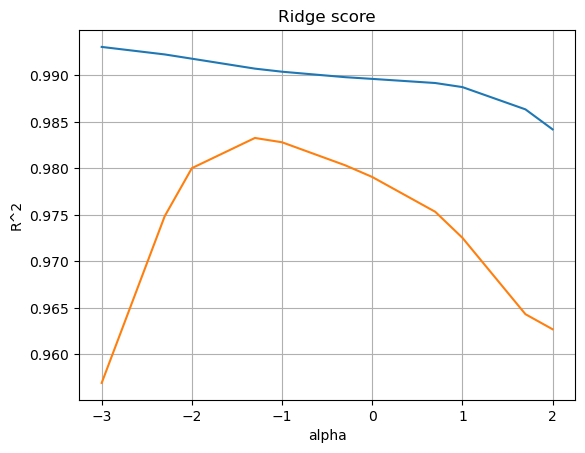

In [41]:
# 알파값별 결정계수 출력
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.title('Ridge score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()

In [44]:
# 최적 알파값 적용 최종 모델 생성
ridge = Ridge(alpha=0.05)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9907126320312708
0.98326301191398


In [45]:
# case3-2. 규제 라쏘 이용

# 라쏘회귀 모델 훈련
from sklearn.linear_model import Lasso
lasso = Lasso()

In [46]:
lasso.fit(train_scaled, train_target)

Lasso()

In [47]:
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [48]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [51]:
# 최적 규제강도(하이퍼파라미터) 설정

# 알파값에 따른 스코어 생성
train_score = []
test_score = []
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    #릿지 모델 생성.
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    #릿지 모델 훈련
    lasso.fit(train_scaled, train_target)
    
    #훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\KGW\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KGW\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KGW\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.1

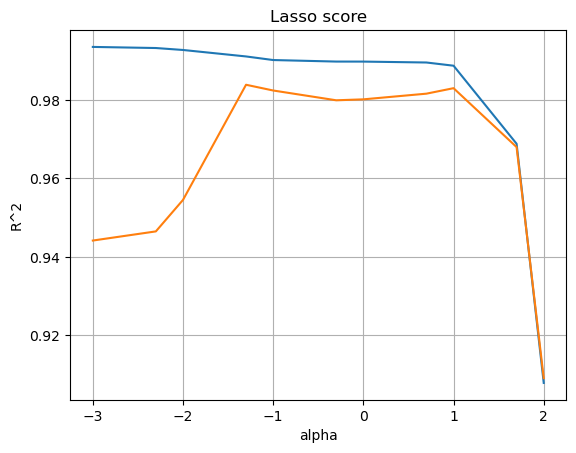

In [52]:
# 알파값별 결정계수 출력
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.title('Lasso score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.grid()
plt.show()

In [54]:
# 최적 알파값 적용 최종 모델 생성
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [59]:
print(poly.get_feature_names_out())
print(lasso.coef_)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.        

In [60]:
print(np.sum(lasso.coef_==0))

40
